In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [13]:
# Load the Dataset
data = pd.read_csv("Cancer_Data.csv")  # Replace with your actual CSV file path

# Drop the 'id' column and preprocess the target variable
data.drop(columns=["id"], inplace=True)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # Encode diagnosis (M=1, B=0)

# Check for missing values
print("Missing values before handling:\n", data.isnull().sum())


Missing values before handling:
 diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unname

In [14]:
# Feature Selection
X = data.drop(columns=["diagnosis"])
y = data["diagnosis"]

# Handle missing values (fill with mean)
X.fillna(X.mean(), inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
print(X_train.isnull().sum())  # Check missing values in training features
print(X_test.isnull().sum())   # Check missing values in testing features


radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                455
dtype: int64
radius_mean               

In [18]:
# Drop the unnecessary column
X_train = X_train.drop(columns=["Unnamed: 32"], errors="ignore")
X_test = X_test.drop(columns=["Unnamed: 32"], errors="ignore")

# Verify that the column has been removed
print(X_train.columns)
print(X_test.columns)


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       '

In [19]:
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Verify that the imputation is complete
print("Missing values in X_train after imputation:\n", X_train.isnull().sum())
print("Missing values in X_test after imputation:\n", X_test.isnull().sum())


Missing values in X_train after imputation:
 radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Missing values in X_test after imputation:
 radius_mean                0

In [20]:
# Initialize ensemble classifiers
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
ab_model = AdaBoostClassifier(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
ab_model.fit(X_train, y_train)


AdaBoostClassifier(random_state=42)

In [21]:
# Make Predictions
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
ab_pred = ab_model.predict(X_test)


In [22]:
# Evaluate Random Forest
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

# Evaluate Gradient Boosting
print("Gradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("\nClassification Report:\n", classification_report(y_test, gb_pred))

# Evaluate AdaBoost
print("AdaBoost Classifier")
print("Accuracy:", accuracy_score(y_test, ab_pred))
print("\nClassification Report:\n", classification_report(y_test, ab_pred))


Random Forest Classifier
Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Gradient Boosting Classifier
Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

AdaBoost Classifier
Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
  

In [23]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate Random Forest
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


Random Forest Classifier
Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [24]:
# Evaluate Gradient Boosting
print("Gradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("\nClassification Report:\n", classification_report(y_test, gb_pred))


Gradient Boosting Classifier
Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [25]:
# Evaluate AdaBoost
print("AdaBoost Classifier")
print("Accuracy:", accuracy_score(y_test, ab_pred))
print("\nClassification Report:\n", classification_report(y_test, ab_pred))


AdaBoost Classifier
Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



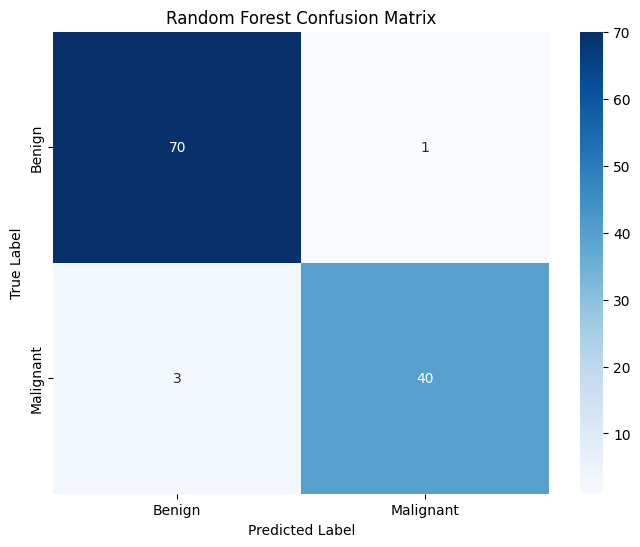

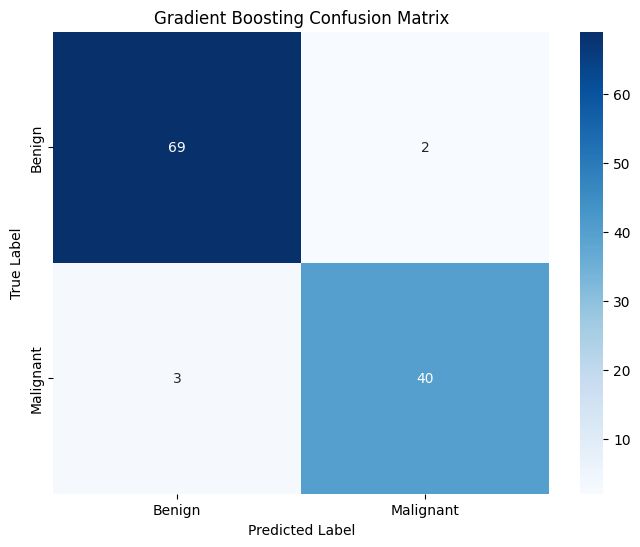

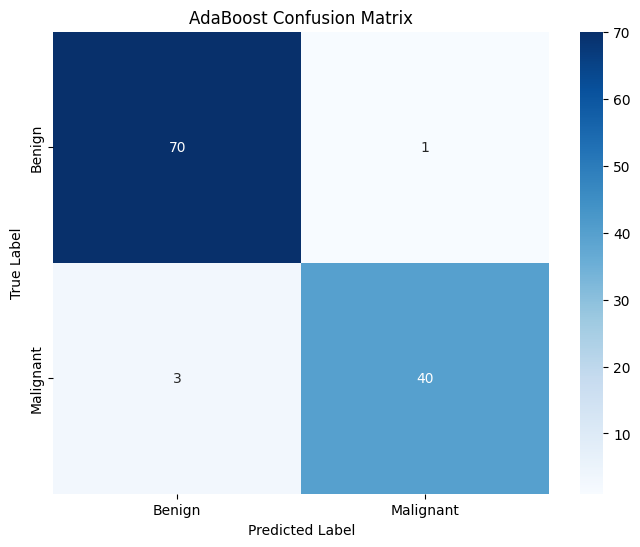

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix Visualization
models = ['Random Forest', 'Gradient Boosting', 'AdaBoost']
predictions = [rf_pred, gb_pred, ab_pred]

for model_name, pred in zip(models, predictions):
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Benign", "Malignant"], 
                yticklabels=["Benign", "Malignant"])
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()


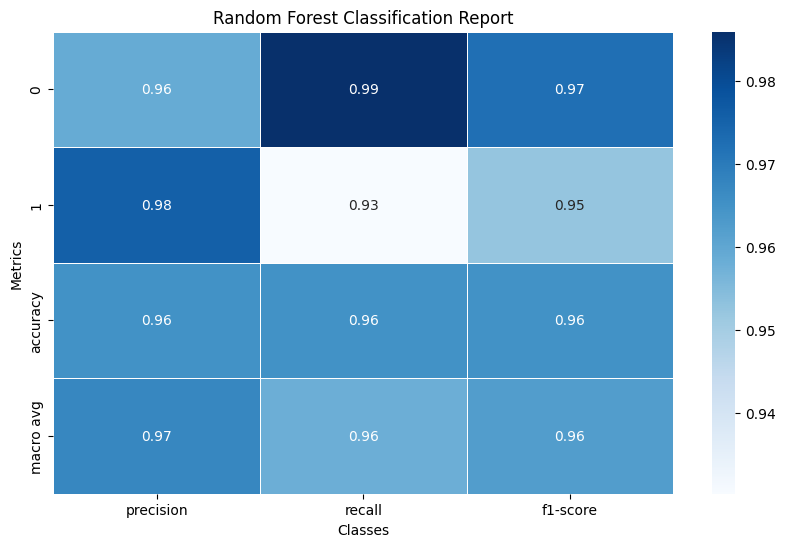

In [27]:
# Random Forest Classification Report
rf_report = classification_report(y_test, rf_pred, output_dict=True)
rf_report_df = pd.DataFrame(rf_report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(rf_report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Random Forest Classification Report")
plt.ylabel("Metrics")
plt.xlabel("Classes")
plt.show()


### 1: Import Libraries for Meta-Ensemble

In [28]:
from sklearn.ensemble import VotingClassifier


### 2: Define Voting Classifier

In [29]:
# Define Voting Classifier with hard voting
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('gb', gb_model),
        ('ab', ab_model)
    ],
    voting='hard'  # Use 'soft' for probabilities
)


### 3: Train Voting Classifier

In [30]:
# Train the Voting Classifier
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('ab', AdaBoostClassifier(random_state=42))])

### 4: Evaluate Voting Classifier

In [31]:
# Evaluate the Voting Classifier
voting_pred = voting_clf.predict(X_test)

print("Voting Classifier")
print("Accuracy:", accuracy_score(y_test, voting_pred))
print("\nClassification Report:\n", classification_report(y_test, voting_pred))


Voting Classifier
Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Using Stacking

### 5: Import Stacking Classifier

In [32]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression  # For meta-learner


### Define Stacking Classifier

In [33]:
# Define Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('gb', gb_model),
        ('ab', ab_model)
    ],
    final_estimator=LogisticRegression()
)


### 7: Train Stacking Classifier

In [34]:
# Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)


StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('ab', AdaBoostClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

### 8: Evaluate Stacking Classifier

In [35]:
# Evaluate the Stacking Classifier
stacking_pred = stacking_clf.predict(X_test)

print("Stacking Classifier")
print("Accuracy:", accuracy_score(y_test, stacking_pred))
print("\nClassification Report:\n", classification_report(y_test, stacking_pred))


Stacking Classifier
Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Key Differences:
- Voting Classifier combines models through majority vote or weighted average of probabilities.
- Stacking Classifier uses a meta-learner to aggregate predictions from base learners.
